## CNN for 2D xy images

In [1]:
%matplotlib inline 
#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import random            as random
import numpy             as np
import pandas            as pd
#import tables            as tb
import matplotlib.pyplot as plt
import os 

In [3]:
import xyimg.dataprep as dp
import xyimg.cnn      as cnn

## Test

In [27]:
path = os.environ['LPRDATADIR']+'xyimg/'
cnn.test(path)

input filename  /scratch/next/data/NEXT100/pressure_topology/xyimg/xyimg_levels_13bar_8x8.npz
output filename  cnn_roc_levels_13bar_8x8_test
Dataset : 
   labels   : ['esum', 'emax']
   x shape  : (205612, 2, 8, 8)
   y shape  : (205612, 1)
   z labels : ['ext', 'seg']
   z shape  : (205612, 2, 8, 8)

CNN : 
   [200, 2, 8, 8] > [200, 4, 4, 4] > [200, 8, 2, 2] > [200, 16, 1, 1] > [200, 16] > [200, 4]
 > [200, 1]

Epoch:  train 0.226 +- 0.046  validation 0.188 +- 0.015
Epoch:  train 0.180 +- 0.014  validation 0.180 +- 0.015
save cnn results at  cnn_roc_levels_13bar_8x8_test
input filename  /scratch/next/data/NEXT100/pressure_topology/xyimg/xyimg_z_13bar_8x8x4.npz
output filename  cnn_roc_z_13bar_8x8x4_test
Dataset : 
   labels   : ['esum']
   x shape  : (205612, 4, 8, 8)
   y shape  : (205612, 1)
   z labels : ['ext', 'seg']
   z shape  : (205612, 2, 4, 8, 8)

CNN : 
   [200, 4, 8, 8] > [200, 8, 4, 4] > [200, 16, 2, 2] > [200, 32, 1, 1] > [200, 32] > [200, 8]
 > [200, 1]

Epoch:  train 0

True

In [ ]:
def production(ipath, opath, pressure, type, sbins, labels, name = ''):

    ifile   = ipath + cnn.xyimg_filename(type, pressure, sbins)
    ofile   = opath + cnn.cnn_filename(type, pressure, sbins, name)
    Dset    = cnn.GoDataset3DImg if type == 'z' else cnn.GoDataset  
    dataset = Dset(ifile, labels)
    box    = cnn.run(dataset, ofilename = ofile)
    print('efficiency {:2.1f}% at 80% rejection'.format(100.*cnn.roc_value(box.y, box.yp, 0.8)[1]))
    return box




In [31]:
ipath = os.environ['LPRDATADIR']+'xyimg/'
opath = os.environ['LPRDATADIR']+'cnn/'

type     = 'z'
pressure = '2bar'
sbins    = '16x16x8'
labels   = ['esum']
name     = 'esum'

box = production(ipath, opath, pressure, type, sbins, labels, name)


Dataset : 
   labels   : ['esum']
   x shape  : (237903, 8, 16, 16)
   y shape  : (237903, 1)
   z labels : ['ext', 'seg']
   z shape  : (237903, 2, 8, 16, 16)

CNN : 
   [200, 8, 16, 16] > [200, 16, 8, 8] > [200, 32, 4, 4] > [200, 64, 2, 2] > [200, 256] > [200, 16]
 > [200, 1]

Epoch:  train 0.249 +- 0.131  validation 0.251 +- 0.019
Epoch:  train 0.184 +- 0.015  validation 0.183 +- 0.014
Epoch:  train 0.176 +- 0.014  validation 0.181 +- 0.013
Epoch:  train 0.171 +- 0.014  validation 0.180 +- 0.014
Epoch:  train 0.167 +- 0.014  validation 0.184 +- 0.014
Epoch:  train 0.163 +- 0.014  validation 0.181 +- 0.015
Epoch:  train 0.160 +- 0.013  validation 0.183 +- 0.015


In [18]:
ofile  = opath + cnn.cnn_filename(type, pressure, sbins, name)    

In [19]:
cnndat = np.load(ofile+'.npz')

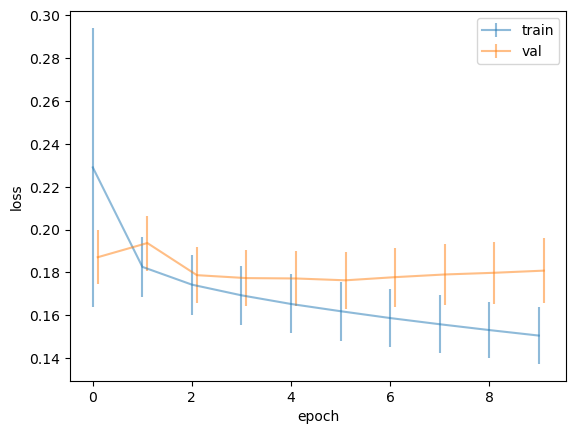

In [20]:
cnn.plot_epochs(cnndat['epochs'])

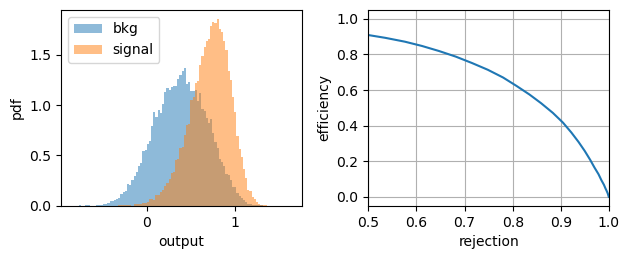

In [21]:
cnn.plot_roc(cnndat['y'], cnndat['yp'], 0.5)

usage: ipykernel_launcher.py [-h] [-pressure PRESSURE] [-type TYPE]
                             [-sbins SBINS] [-labels N [N ...]] [-name NAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/jahernando/.local/share/jupyter/runtime/kernel-d564bbe6-c013-4597-a35c-90f4f4264bd7.json


SystemExit: 2

/scicomp/builds/Rocky/8.7/Common/software/Anaconda3/2023.03-1/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [168]:
sel = (df.y == 0) & (df.yp >= yp90)
bkg90 = df.ids[sel].values
bkg90

array([143933, 143981, 144005, ..., 184926, 185016, 185038])

[0]


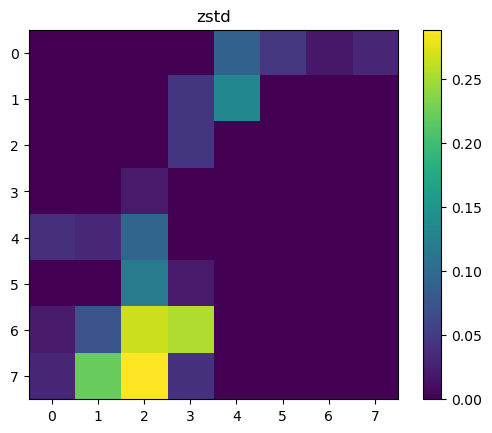

In [169]:
xi = box.dataset.xs[bkg90[0]]
yi = box.dataset.ys[bkg90[0]]
print(yi)
ixi = 6
plt.imshow(xi[ixi]); plt.title(box.dataset.labels[ixi]); plt.colorbar();

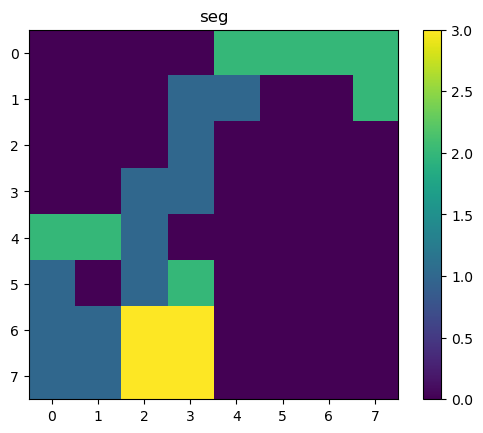

In [173]:
zi = box.dataset.zs[bkg90[0]]
ixi = 1
plt.imshow(zi[ixi]); plt.title(box.dataset.zlabels[ixi]); plt.colorbar();

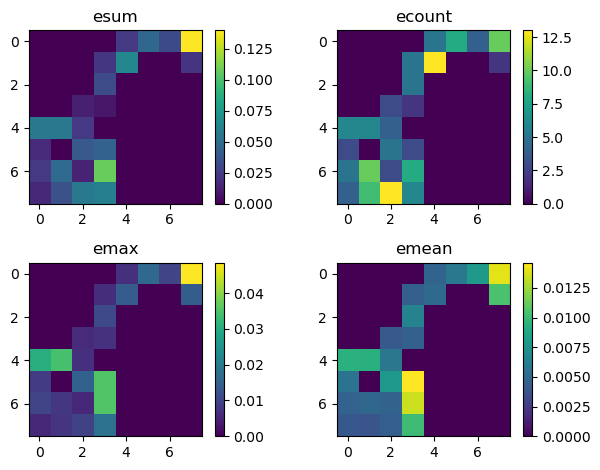

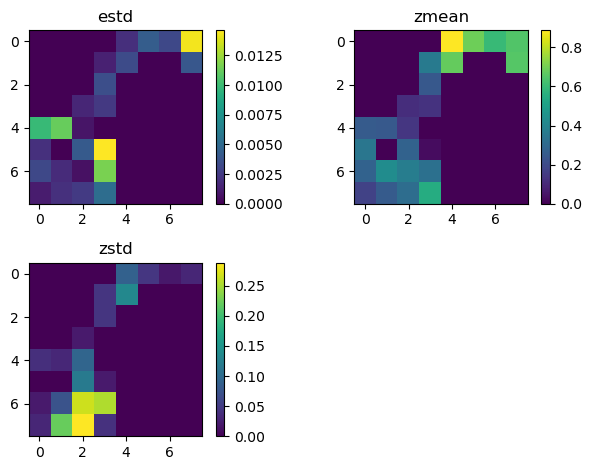

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [175]:
dp.plot_imgs(box.dataset.xs, bkg90[0], box.dataset.labels)

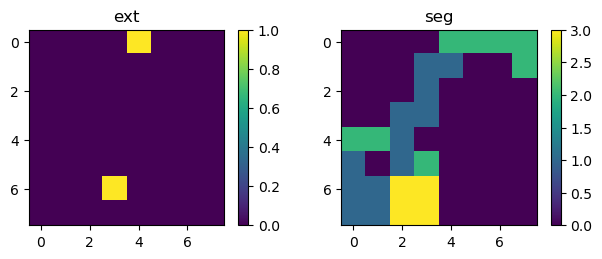

<Figure size 640x480 with 0 Axes>

In [176]:
dp.plot_imgs(box.dataset.zs, bkg90[0], box.dataset.zlabels)

In [107]:
cnn.test_box_index(box)
cnn.test_box_save(box, ofile+'.npz')
cnndata = np.load(ofile+'.npz')
np.all(np.array(box.epochs) == cnndata['epochs'])
#cnn.test_box_save(box, ofile+'.npz')

True

## Developement

In [49]:
def test_index_test(box, fractions = (0.7, 0.2)):
    index = cnn._index(len(box.dataset), (0.7, 0.2))

    ys  = np.array(box.dataset[index[0]:index[1]][1], dtype = int).flatten()
    ys0 = box.dataset.ys[index[0]:index[1]].flatten()
    ys1 = np.array(box.y, dtype = int).flatten()
    assert np.all(ys == ys0)
    assert np.all(ys == ys1)
    return True

test_index_test(box)



True

## Run

In [146]:
model, dataset, sums, ys, ysp = cnn.run(pressure, bins, epochs = 20)

x labels  ['esum', 'emax', 'emean', 'estd', 'counts']
z labels  ['ext', 'seg']
shapes  (103131, 5, 16, 16) (102481, 5, 16, 16)
['esum', 'emax', 'emean', 'estd', 'counts']
torch.Size([200, 5, 16, 16])
torch.Size([200, 10, 8, 8])
torch.Size([200, 20, 4, 4])
torch.Size([200, 40, 2, 2])
torch.Size([200, 160])
torch.Size([200, 10])
epoch  ((0.2191927890603741, 0.09527358268199414), (0.18307305047812972, 0.015206269398756094))
epoch  ((0.17384204988678295, 0.014554698260681185), (0.17300936391631377, 0.015565654116338931))
epoch  ((0.16719788743389977, 0.013839658785397328), (0.16389067789304604, 0.014913408336142943))
epoch  ((0.16266549991236792, 0.013945406375199258), (0.17059590747055497, 0.01510785193577524))
epoch  ((0.1589572951818506, 0.014414129123096375), (0.15884897026043493, 0.013046836709424999))
epoch  ((0.1558692038887077, 0.014363522414219716), (0.16341783554808606, 0.015108237903999932))
epoch  ((0.15310794045734738, 0.01406202479804646), (0.16406197751899368, 0.015918859265

## Validation

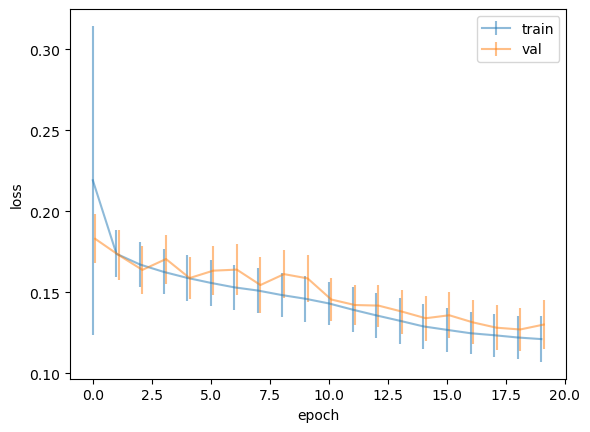

In [147]:
cnn.plot_evolution(sums)

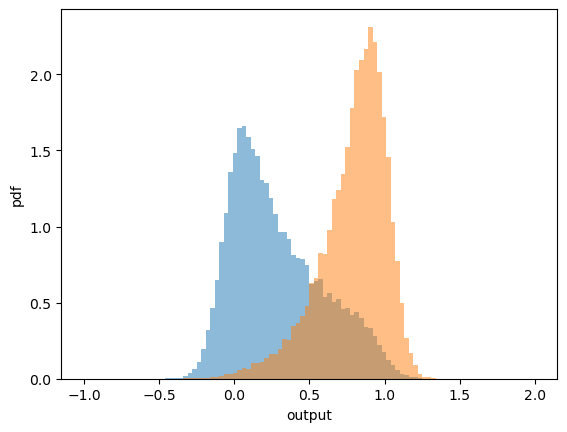

In [148]:
cnn.plot_distributions(ys, ysp)

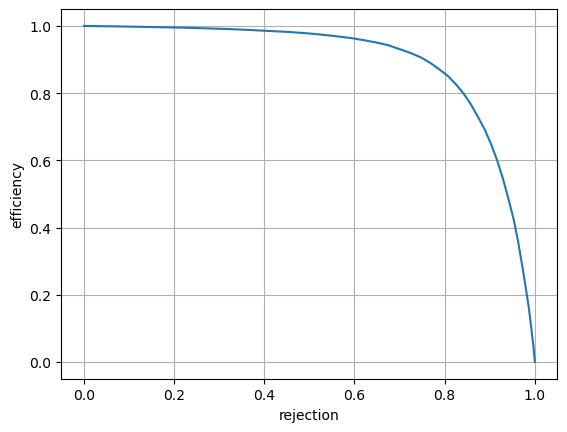

In [149]:
cnn.plot_roc(ys, ysp)

### model

In [319]:
class CNN_C33P11Pool2L1(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 8, n_scale = 2):
        super().__init__()
        self.conv1  = nn.Conv2d(1, n_depth, 3, padding = 1)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 3, padding = 1)
        self.bn2    = nn.BatchNorm2d( n_scale * n_depth)
        self.pool   = nn.MaxPool2d(2, 2)
        self.fc0    = nn.Linear(4 * n_scale * n_depth, 1)

    def forward(self, x):
        x = self.pool(self.bn1(F.leaky_relu(self.conv1(x))))
        x = self.pool(self.bn2(F.leaky_relu(self.conv2(x))))
        x = x.flatten(start_dim=1)
        #x = self.drop(x)
        x = self.fc0(x)
        return x
    

class CNN_C33P11Poll2L2(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 8, n_scale = 2):
        super().__init__()
        self.conv1  = nn.Conv2d(1, n_depth, 3, padding = 1)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 3, padding = 1)
        self.bn2    = nn.BatchNorm2d( n_scale * n_depth)
        self.pool   = nn.MaxPool2d(2, 2)
        self.fc0    = nn.Linear(4 * n_scale * n_depth, n_depth)
        self.fc1    = nn.Linear(n_depth, 1)


    def forward(self, x):
        x = self.pool(self.bn1(F.leaky_relu(self.conv1(x))))
        x = self.pool(self.bn2(F.leaky_relu(self.conv2(x))))
        x = x.flatten(start_dim=1)
        #x = self.drop(x)
        x = self.fc0(x)
        x = self.fc1(x)
        return x


class CNN_C53P00L2(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 16, n_scale = 2):
        super().__init__()
        self.debug = True
        self.conv1  = nn.Conv2d(1, n_depth, 5, padding = 0)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 3, padding = 0)
        self.bn2    = nn.BatchNorm2d(n_scale * n_depth)
        self.fc0    = nn.Linear(4 * n_scale * n_depth, n_depth)
        self.fc1    = nn.Linear(n_depth, 1)

    def forward(self, x):
        if (self.debug): print(x.size())
        x = self.bn1(F.leaky_relu(self.conv1(x)));  
        if (self.debug): print(x.size())
        x = self.bn2(F.leaky_relu(self.conv2(x)));  
        if (self.debug): print(x.size())
        x = x.flatten(start_dim=1);
        if (self.debug): print(x.size())
        x = self.fc0(x); 
        if (self.debug): print(x.size())
        x = self.fc1(x)
        self.debug = False
        return x



class CNN_C353P100L2(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 16, n_scale = 2):
        super().__init__()
        self.debug = True
        self.conv1  = nn.Conv2d(1, n_depth, 3, padding = 1)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 5, padding = 0)
        self.bn2    = nn.BatchNorm2d(n_scale * n_depth)
        self.conv3  = nn.Conv2d(n_scale * n_depth, 2 * n_scale * n_depth, 3, padding = 0)
        self.bn3    = nn.BatchNorm2d(2 * n_scale * n_depth)
        self.fc0    = nn.Linear(4 * 2 * n_scale * n_depth, n_depth)
        self.fc1    = nn.Linear(n_depth, 1)

    def forward(self, x):
        if (self.debug): print('0 > ', x.size())
        x = self.bn1(F.leaky_relu(self.conv1(x)));  
        if (self.debug): print('1 > ', x.size())
        x = self.bn2(F.leaky_relu(self.conv2(x)));  
        if (self.debug): print('2 > ', x.size())
        x = self.bn3(F.leaky_relu(self.conv3(x)));  
        if (self.debug): print('3 > ', x.size())
        x = x.flatten(start_dim=1);
        if (self.debug): print('4 > ', x.size())
        x = self.fc0(x); 
        if (self.debug): print('5 > ', x.size())
        x = self.fc1(x)
        self.debug = False
        return x
    

class CNN_C35P00L2(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 16, n_scale = 2):
        super().__init__()
        self.debug = True
        self.conv1  = nn.Conv2d(1, n_depth, 3, padding = 0)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 5, padding = 0)
        self.bn2    = nn.BatchNorm2d(n_scale * n_depth)
        self.fc0    = nn.Linear(4 * n_scale * n_depth, n_depth)
        self.fc1    = nn.Linear(n_depth, 1)

    def forward(self, x):
        if (self.debug): print('0 > ', x.size())
        x = self.bn1(F.leaky_relu(self.conv1(x)));  
        if (self.debug): print('1 > ', x.size())
        x = self.bn2(F.leaky_relu(self.conv2(x)));  
        if (self.debug): print('2 > ', x.size())
        x = x.flatten(start_dim=1);
        if (self.debug): print('0 > ', x.size())
        x = self.fc0(x); 
        if (self.debug): print('1 > ', x.size())
        x = self.fc1(x)
        self.debug = False
        return x
    
class CNN_C53P00L2(nn.Module):
    """ Starts from a (8, 8) image, process 3 convolutional layers and a linear layer to a unique output
    """

    def __init__(self, n_depth = 16, n_scale = 2):
        super().__init__()
        self.debug = True
        self.conv1  = nn.Conv2d(1, n_depth, 5, padding = 0)
        self.bn1    = nn.BatchNorm2d(n_depth)
        self.conv2  = nn.Conv2d(n_depth, n_scale * n_depth, 3, padding = 0)
        self.bn2    = nn.BatchNorm2d(n_scale * n_depth)
        self.fc0    = nn.Linear(4 * n_scale * n_depth, n_depth)
        self.fc1    = nn.Linear(n_depth, 1)

    def forward(self, x):
        if (self.debug): print('0 > ', x.size())
        x = self.bn1(F.leaky_relu(self.conv1(x)));  
        if (self.debug): print('1 > ', x.size())
        x = self.bn2(F.leaky_relu(self.conv2(x)));  
        if (self.debug): print('2 > ', x.size())
        x = x.flatten(start_dim=1);
        if (self.debug): print('0 > ', x.size())
        x = self.fc0(x); 
        if (self.debug): print('1 > ', x.size())
        x = self.fc1(x)
        self.debug = False
        return x

In [35]:
def chi2_loss(ys_pred, ys):
    squared_diffs = (ys_pred - ys) ** 2
    return squared_diffs.mean()

In [352]:
def _cuda(xs, ys):
    if torch.cuda.is_available():
        xs = xs.cuda()
        ys = ys.cuda()
        return xs, ys
    return xs, ys

def _training(model, optimizer, train):
    losses = []
    for xs, ys in train:
        xs, ys = _cuda(xs, ys)
        model.train()
        optimizer.zero_grad()
        ys_pred = model(xs)
        loss    = chi2_loss(ys_pred, ys)
        loss.backward()
        optimizer.step()
        losses.append(loss.data.item())
    return losses

def _validation(model, val):
    losses = []
    with torch.no_grad():
        model.eval()
        for xs, ys in val:
            xs, ys = _cuda(xs, ys)
            ys_pred = model(xs)
            loss    = chi2_loss(ys_pred, ys)
            losses.append(loss.data.item())
    return losses


def _epoch(model, optimizer, train, val):

    losses_train = _training(model, optimizer, train)
    losses_val   = _validation(model, val)

    _sum = lambda x: (np.mean(x), np.std(x))

    val = (_sum(losses_train), _sum(losses_val)) 
    print('epoch ', val)

    return (_sum(losses_train), _sum(losses_val)) 

def train_model(model, optimizer, train, val, nepochs = 20):

    sums = [_epoch(model, optimizer, train, val) for i in range(nepochs)]
    return sums
    

In [37]:
def plot_evolution(sums):
    us  = [sum[0][0] for sum in sums]
    eus = [sum[0][1] for sum in sums]
    vs  = [sum[1][0] for sum in sums]
    evs = [sum[1][1] for sum in sums]
    plt.errorbar(range(len(us)), us, yerr = eus, alpha = 0.5, label = "train")
    plt.errorbar(0.1+np.arange(len(vs)), vs, yerr = evs, alpha = 0.5, label = "val")
    plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend();

### Test

In [38]:
def prediction(model, test):
    nys, nys_pred = [], []
    with torch.no_grad():
        model.eval()
        for xs, ys in test:
            xs, ys = _cuda(xs, ys)
            ys_pred = model(xs)
    return ys.numpy(), ys_pred.numpy()

def roc_vals(ys, ys_pred):
    y0 , uedges = np.histogram(ys_pred[ys == 0], bins = 100, range = (-1.5, 1.5), density = True) 
    y1, _       = np.histogram(ys_pred[ys == 1], bins = 100, range = (-1.5, 1.5), density = True) 
    y0c =      np.cumsum(y0)/np.sum(y0)
    y1c = 1. - np.cumsum(y1)/np.sum(y1)
    return y0c, y1c

## Run

In [362]:
NNType    = CNN_C353P100L2
#NNType    = CNN_C53P00L2
#NNType    = CNN_C35P00L2
#NNType    = CNN_C53P00L2 # No so good
pressure  = "13bar"
n_depth   = 32
n_epochs  = 10

In [363]:
dataset = ChessDataset(pressure)

train, test, val = subsets(dataset)

In [364]:
# Load the model.
model = NNType(n_depth = n_depth)

if torch.cuda.is_available():
    model = model.cuda()

# Set up the optimizer and loss function.
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [365]:
sums = train_model(model, optimizer, train, val, nepochs = n_epochs)

0 >  torch.Size([200, 1, 8, 8])
1 >  torch.Size([200, 32, 8, 8])
2 >  torch.Size([200, 64, 4, 4])
3 >  torch.Size([200, 128, 2, 2])
4 >  torch.Size([200, 512])
5 >  torch.Size([200, 32])
epoch  ((0.21253981166001823, 0.03372150153650682), (0.18906637056938652, 0.013859438408117273))
epoch  ((0.18107156422403123, 0.012859320454080487), (0.17794140044925283, 0.013343772047403751))
epoch  ((0.17200755561805434, 0.013314802061743047), (0.16992964819797035, 0.01272277510938802))
epoch  ((0.1649074233447512, 0.013412540031701657), (0.16721375503586333, 0.01155781092145216))
epoch  ((0.15904726701685123, 0.013494878556780856), (0.16698008558703858, 0.014741131849243272))
epoch  ((0.15404554413010677, 0.013490129677990991), (0.16306533310019855, 0.014094274976951697))
epoch  ((0.14968693910373582, 0.012981312420948073), (0.16155573971641873, 0.013265156001245572))
epoch  ((0.14476171924422185, 0.0132417848579621), (0.16180567949720956, 0.014485005910570583))
epoch  ((0.1401397490873933, 0.0127

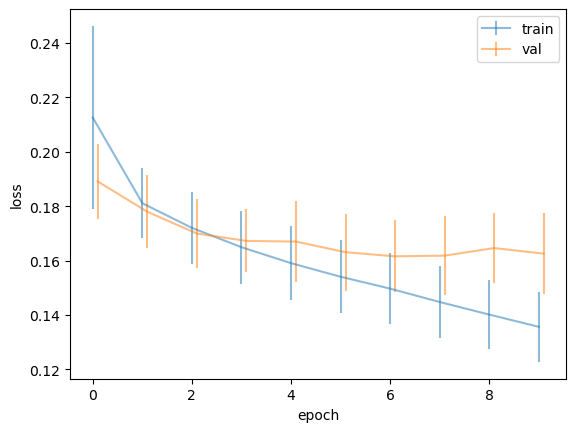

In [366]:
plot_evolution(sums)

In [367]:
ys, ysp = prediction(model, test)

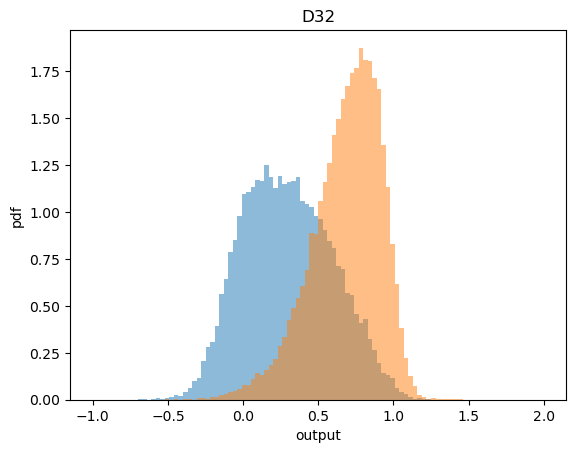

In [368]:
plt.hist(ysp[ys == 0], 100, range = (-1, 2), density = True, alpha = 0.5)
plt.hist(ysp[ys == 1], 100, range = (-1, 2), density = True, alpha = 0.5);
plt.xlabel('output'); plt.ylabel('pdf'); plt.title('D'+str(n_depth));

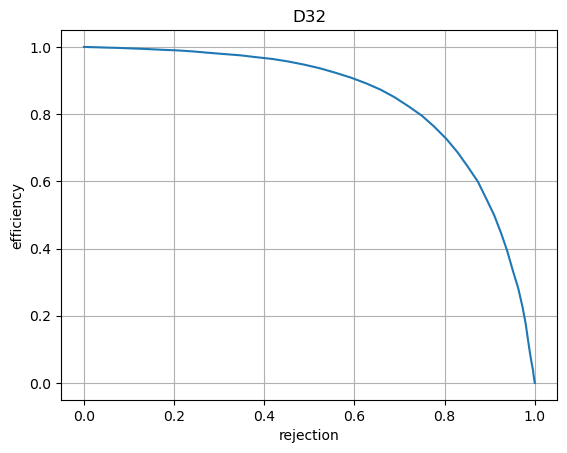

In [369]:
defplot_roc(ys))
y0c, y1c = roc_vals(ys, ysp)
plt.plot(y0c, y1c); plt.grid(); plt.xlabel('rejection'); plt.ylabel("efficiency");  plt.title('D'+str(n_depth));

In [370]:
i0 = np.max(np.argwhere(y1c >= 0.75))
print(y0c[i0], y1c[i0])

0.7765797055680815 0.762966962136028


## Code

In [94]:
def xylabel(xlabel = "x (mm)", ylabel = "y (mm)"):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [6]:
def lstats(var):
    mean, std = np.mean(var), np.std(var)
    comment = "mean = {:.3f} \n std = {:.3f}".format(mean, std)
    return comment

## Prepare Data

In [29]:
m0, n0 = 1, 8
m1, k1, p1 = 6, 3, 0
n1 = (n0 - k1 + 1) / max(p1, 1)
m2, k2, p2 = 12, 3, 0
n2 = (n1 - k2 + 1) / max(p2, 1)

l0 = m2 * n2 * n2
l1 = n0 * n0
l2 = int(l1/2)
l3 = int(l2/2)



In [30]:
print(m0, n0)
print(m1, n1)
print(m2, n2)
print(l0, l1, l2, l3)

1 8
6 6.0
12 4.0
192.0 64 32 16


In [91]:
from datetime import datetime

current_time = datetime.now()
formatted_time = current_time.strftime('%A %d %B %Y')
print(formatted_time)
formatted_time = current_time.strftime('%H:%M:%S')
print(formatted_time)


Thursday 11 April 2024
15:02:46
